In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
crime_data.shape

(50, 5)

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Normalization Function

In [9]:
def minmax_func(i):
    x= (i-i.min())/(i.max()- i.min())
    return(x)

Normalized data from (Considering the numerical part of the data):-

In [10]:
crime_norm = minmax_func(crime_data.iloc[:,1:])
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


DENDROGRAM

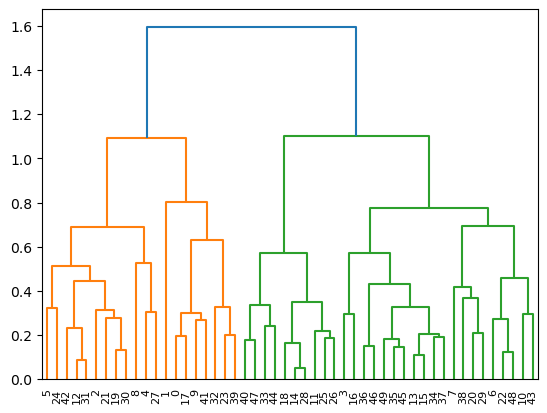

In [11]:
denderogram = sch.dendrogram(sch.linkage(crime_norm,method='complete'))

Create Clusters

In [12]:
hc = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean',linkage ='complete')

Create Labels

In [13]:
y_hc = hc.fit_predict(crime_norm)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [14]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [15]:
crime_data.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Alabama         13.2    236      58        21.2    1
Pennsylvania    6.3     106      72        14.9    1
Nevada          12.2    252      81        46.0    1
New Hampshire   2.1     57       56        9.5     1
New Jersey      7.4     159      89        18.8    1
New Mexico      11.4    285      70        32.1    1
New York        11.1    254      86        26.1    1
North Carolina  13.0    337      45        16.1    1
North Dakota    0.8     45       44        7.3     1
Ohio            7.3     120      75        21.4    1
Oklahoma        6.6     151      68        20.0    1
Oregon          4.9     159      67        29.3    1
Rhode Island    3.4     174      87        8.3     1
Alaska          10.0    263      48        44.5    1
South Carolina  14.4    279      48        22.5    1
South Dakota    3.8     86       45        12.8    1
Tennessee       13.2    188      59        26.9    1
Texas           12.7    201      80        25.5    

In [16]:
crime_data['h_clusterid'] = y_hc
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [17]:
crime_data.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


K- Means

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:,1:])
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

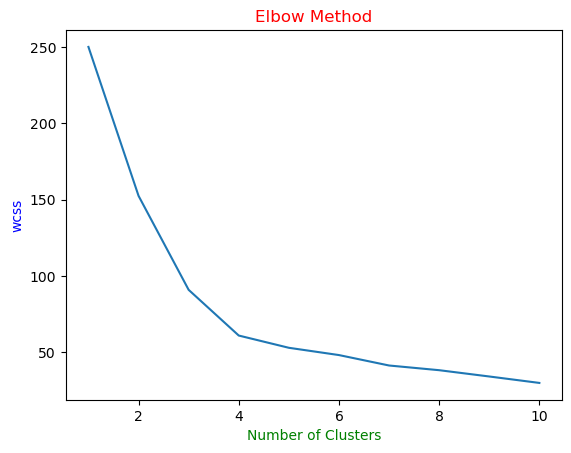

In [19]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append( km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method', color = 'red')
plt.xlabel('Number of Clusters', color = 'green')
plt.ylabel('wcss', color = 'blue')
plt.show()

In [20]:
wcss

[250.00000000000006,
 152.47179575919472,
 90.91274995389851,
 60.98192523059026,
 52.96047279290853,
 48.193826948682606,
 41.36131010984026,
 38.28596172799917,
 34.166378227983785,
 29.951698223720292]

Selecting 4 clusters from above plot

In [21]:
model =KMeans(n_clusters=4)
model.fit(crime_norm)
model.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [22]:
x= crime_data.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(scaled_data)
y_means

array([2, 2, 3, 2, 3, 3, 1, 1, 3, 2, 1, 0, 3, 1, 0, 1, 1, 2, 0, 3, 1, 3,
       1, 2, 3, 0, 0, 3, 0, 1, 3, 3, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 3, 1,
       0, 1, 1, 0, 0, 1])

In [23]:
x[y_means==0,0]

array(['Idaho', 'Iowa', 'Maine', 'Montana', 'Nebraska', 'New Hampshire',
       'North Dakota', 'South Dakota', 'Vermont', 'West Virginia',
       'Wisconsin'], dtype=object)

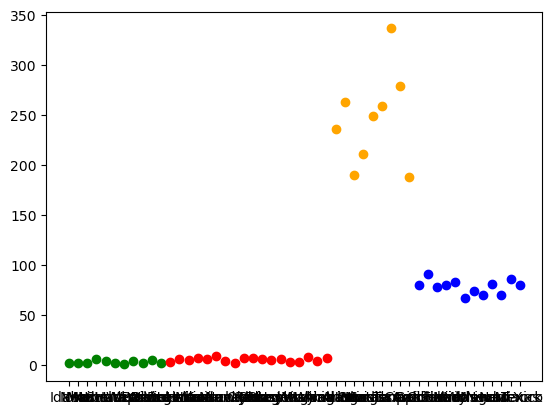

In [24]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color="green")
plt.scatter(x[y_means==1,0],x[y_means==1,1],color="red")
plt.scatter(x[y_means==2,0],x[y_means==2,2],color="orange")
plt.scatter(x[y_means==3,0],x[y_means==3,3],color="Blue")
plt.show()

Now, DB - Scan:-

In [25]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [26]:
crime_data.drop(['Unnamed: 0','Assault'],axis=1,inplace=True)

In [27]:
crime_data

,Murder,UrbanPop,Rape,h_clusterid
0,13.2,58,21.2,0
1,10.0,48,44.5,0
2,8.1,80,31.0,3
3,8.8,50,19.5,1
4,9.0,91,40.6,3
5,7.9,78,38.7,3
6,3.3,77,11.1,1
7,5.9,72,15.8,1
8,15.4,80,31.9,3
9,17.4,60,25.8,0


In [28]:
array_DBSCAN= crime_data.values
array_DBSCAN

array([[13.2, 58. , 21.2,  0. ],
       [10. , 48. , 44.5,  0. ],
       [ 8.1, 80. , 31. ,  3. ],
       [ 8.8, 50. , 19.5,  1. ],
       [ 9. , 91. , 40.6,  3. ],
       [ 7.9, 78. , 38.7,  3. ],
       [ 3.3, 77. , 11.1,  1. ],
       [ 5.9, 72. , 15.8,  1. ],
       [15.4, 80. , 31.9,  3. ],
       [17.4, 60. , 25.8,  0. ],
       [ 5.3, 83. , 20.2,  1. ],
       [ 2.6, 54. , 14.2,  2. ],
       [10.4, 83. , 24. ,  3. ],
       [ 7.2, 65. , 21. ,  1. ],
       [ 2.2, 57. , 11.3,  2. ],
       [ 6. , 66. , 18. ,  1. ],
       [ 9.7, 52. , 16.3,  1. ],
       [15.4, 66. , 22.2,  0. ],
       [ 2.1, 51. ,  7.8,  2. ],
       [11.3, 67. , 27.8,  3. ],
       [ 4.4, 85. , 16.3,  1. ],
       [12.1, 74. , 35.1,  3. ],
       [ 2.7, 66. , 14.9,  1. ],
       [16.1, 44. , 17.1,  0. ],
       [ 9. , 70. , 28.2,  3. ],
       [ 6. , 53. , 16.4,  2. ],
       [ 4.3, 62. , 16.5,  2. ],
       [12.2, 81. , 46. ,  3. ],
       [ 2.1, 56. ,  9.5,  2. ],
       [ 7.4, 89. , 18.8,  1. ],
       [11

In [29]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array_DBSCAN)

NameError: name 'array' is not defined

In [30]:
x

array([['Alabama', 13.2, 236, 58, 21.2, 0],
       ['Alaska', 10.0, 263, 48, 44.5, 0],
       ['Arizona', 8.1, 294, 80, 31.0, 3],
       ['Arkansas', 8.8, 190, 50, 19.5, 1],
       ['California', 9.0, 276, 91, 40.6, 3],
       ['Colorado', 7.9, 204, 78, 38.7, 3],
       ['Connecticut', 3.3, 110, 77, 11.1, 1],
       ['Delaware', 5.9, 238, 72, 15.8, 1],
       ['Florida', 15.4, 335, 80, 31.9, 3],
       ['Georgia', 17.4, 211, 60, 25.8, 0],
       ['Hawaii', 5.3, 46, 83, 20.2, 1],
       ['Idaho', 2.6, 120, 54, 14.2, 2],
       ['Illinois', 10.4, 249, 83, 24.0, 3],
       ['Indiana', 7.2, 113, 65, 21.0, 1],
       ['Iowa', 2.2, 56, 57, 11.3, 2],
       ['Kansas', 6.0, 115, 66, 18.0, 1],
       ['Kentucky', 9.7, 109, 52, 16.3, 1],
       ['Louisiana', 15.4, 249, 66, 22.2, 0],
       ['Maine', 2.1, 83, 51, 7.8, 2],
       ['Maryland', 11.3, 300, 67, 27.8, 3],
       ['Massachusetts', 4.4, 149, 85, 16.3, 1],
       ['Michigan', 12.1, 255, 74, 35.1, 3],
       ['Minnesota', 2.7, 72, 66, 14.9

In [31]:
stscaler = StandardScaler()
X=stscaler.fit_transform(array_DBSCAN)
X

array([[ 1.25517927, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.03768506, -0.0250209 , -0.50756473],
       [-1.29599811, -0.5959823 , -1.07115345,  0.46852129],
       [-0.41468229,  0.03210209, -0.34856705, -0.50756473],
       [ 0.44344101, -0.

In [32]:
dbscan = DBSCAN(eps=1.2,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=4)

Noisy samples are given the labels -1.

In [33]:
dbscan.labels_

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  1,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [34]:
crime_data['cluster']=pd.DataFrame(dbscan.labels_)
crime_data

,Murder,UrbanPop,Rape,h_clusterid,cluster
0,13.2,58,21.2,0,0
1,10.0,48,44.5,0,-1
2,8.1,80,31.0,3,1
3,8.8,50,19.5,1,2
4,9.0,91,40.6,3,1
5,7.9,78,38.7,3,1
6,3.3,77,11.1,1,2
7,5.9,72,15.8,1,2
8,15.4,80,31.9,3,1
9,17.4,60,25.8,0,0


In [35]:
crime_data['cluster'].value_counts()

 2    30
 1    11
 0     7
-1     2
Name: cluster, dtype: int64

To find the % of noise points:-

In [36]:
(len(crime_data[crime_data['cluster']==-1])/len(crime_data))*100

4.0

In [37]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.4251562001046779

In [38]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(x[:,1],x[:,1],c=y_pred,edgecolors='blue')
    plt.scatter(x[:,2],x[:,1],c=y_pred,edgecolors='green')
    plt.scatter(x[:,3],x[:,1],c=y_pred)
    plt.title('DBSCAN')

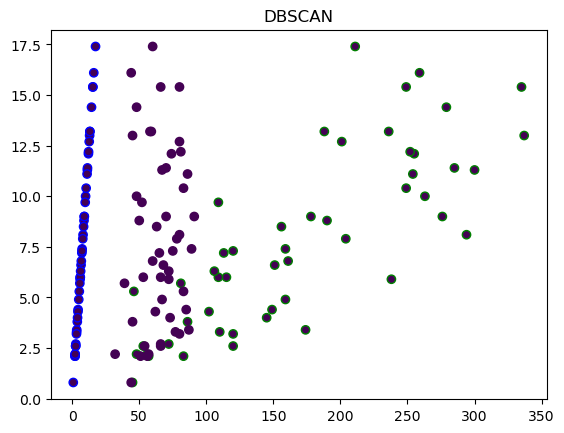

In [39]:
dbscan(scaled_data,0.3,7)